# csv dados stardew valley do kaggle

In [3]:
!pip --quiet install pyspark kagglehub pyngrok

In [4]:
import kagglehub
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, sum, when 
from plotly.subplots import make_subplots 
import plotly.graph_objects as go 
from pyngrok import ngrok 

In [5]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
path = kagglehub.dataset_download("jessicaebrown/stardew-valley-full-catelog")

print("Path to dataset files:", path)

Path to dataset files: /home/spinho/.cache/kagglehub/datasets/jessicaebrown/stardew-valley-full-catelog/versions/8


In [7]:
villagers_csv = f"{path}/villagers.csv"
print("CSV file:", villagers_csv)

CSV file: /home/spinho/.cache/kagglehub/datasets/jessicaebrown/stardew-valley-full-catelog/versions/8/villagers.csv


In [8]:
fish_csv = f"{path}/fish_detail.csv"
print("CSV file:", fish_csv)

CSV file: /home/spinho/.cache/kagglehub/datasets/jessicaebrown/stardew-valley-full-catelog/versions/8/fish_detail.csv


In [9]:
fishpr_csv = f"{path}/fish_price_breakdown.csv"
print("CSV file:", fishpr_csv)

CSV file: /home/spinho/.cache/kagglehub/datasets/jessicaebrown/stardew-valley-full-catelog/versions/8/fish_price_breakdown.csv


In [10]:
df_villa = pd.read_csv(villagers_csv)

In [13]:
df_villa.head()

,Name,Gender,Marriage Candidate,Giftable,Heart Events
0,Alex,Male,Yes,Yes,8
1,Elliot,Male,Yes,Yes,7
2,Harvey,Male,Yes,Yes,7
3,Sam,Male,Yes,Yes,8
4,Sebastian,Male,Yes,Yes,7


(array([12., 33.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

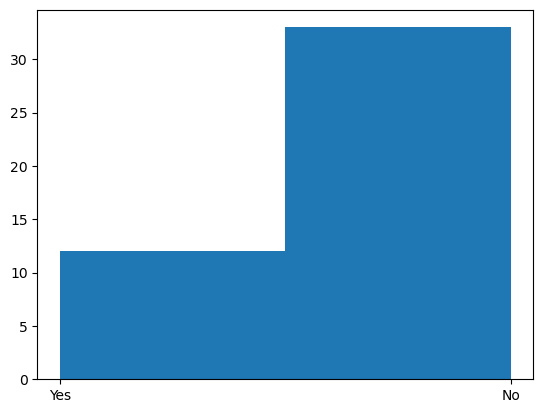

In [11]:
plt.figure()
plt.hist(df_villa['Marriage Candidate'],bins=2)

In [14]:
dfp = pd.read_csv(fish_csv)
dfpp = pd.read_csv(fishpr_csv)

In [15]:
print('peixes: ', dfp.columns,'\nvalores_peixes: ',dfpp.columns)

peixes:  Index(['Name', 'Description', 'Location', 'Time', 'Season', 'Weather',
       'Size (inches)', 'Difficulty & Behavior', 'Base XP', 'Used In'],
      dtype='object') 
valores_peixes:  Index(['Name', 'Pufferfish', 'Anchovy', 'Tuna', 'Sardine', 'Bream',
       'Largemouth Bass', 'Smallmouth Bass', 'Rainbow Trout', 'Salmon',
       'Walleye', 'Perch', 'Carp', 'Catfish', 'Pike', 'Sunfish', 'Red Mullet',
       'Herring', 'Eel', 'Octopus', 'Red Snapper', 'Squid', 'Sea Cucumber',
       'Super Cucumber', 'Ghostfish', 'Stonefish', 'Ice Pip', 'Lava Eel',
       'Sandfish', 'Scorpion Carp', 'Flounder', 'Midnight Carp', 'Sturgeon',
       'Tiger Trout', 'Bullhead', 'Tilapia', 'Chub', 'Dorado', 'Albacore',
       'Shad', 'Lingcod', 'Halibut', 'Woodskip', 'Void Salmon', 'Slimejack',
       'Stingray', 'Lionfish', 'Blue Discus'],
      dtype='object')


In [16]:
dfp.head()

,Name,Description,Location,Time,Season,Weather,Size (inches),Difficulty & Behavior,Base XP,Used In
0,Pufferfish,Inflates when threatened.,"Ocean, Ginger Island oceans",12pm – 4pm,Summer\n(All Seasons on Ginger Island),Sun,1-37,80 floater,29,Specialty Fish Bundle Abigail (loved gift)\n ...
1,Anchovy,A small silver fish found in the ocean.,Ocean,Anytime,Spring\n Fall,Any,1-17,30 dart,13,No Uses
2,Tuna,A large fish that lives in the ocean.,"Ocean, Ginger Island oceans",6am – 7pm,Summer\n Winter\n(All Seasons on Ginger Island),Any,12-61,70 smooth,26,Ocean Fish Bundle\n Quality Fish Bundle Fish Taco
3,Sardine,A common ocean fish.,Ocean,6am – 7pm,Spring\n Fall\n Winter,Any,1-13,30 dart,13,Ocean Fish Bundle Dish O' The Sea
4,Bream,A fairly common river fish that becomes active...,River (Town+Forest),6pm – 2am,All Seasons,Any,12-31,35 smooth,14,Night Fishing Bundle Baked Fish


In [17]:
dfp.describe()

,Base XP
count,47.000000
mean,21.595745
std,6.615724
min,8.000000
25%,18.000000
50%,21.000000
75%,28.000000
max,34.000000


In [16]:
dfpp.describe().T

,count,unique,top,freq
Name,12,12,Base Price,1
Pufferfish,12,9,250g,2
Anchovy,12,10,37g,2
Tuna,12,9,125g,2
Sardine,12,9,50g,2
Bream,12,10,56g,2
Largemouth Bass,12,9,125g,2
Smallmouth Bass,12,9,62g,2
Rainbow Trout,12,9,81g,2
Salmon,12,10,93g,2


ideia: baseado no horário do dia e estação, retornar qual o peixe mais rentável para ser pescado

In [17]:
# outro dataset: esses das plantações

path1 = kagglehub.dataset_download("shinomikel/stardew-valley-spring-crop-info")
print("Path to dataset files:", path1)
prim_csv = f"{path1}/spring_crops_info.csv"
ver_csv = f"{path1}/summer_crops_info.csv"
out_csv = f"{path1}/fall_crop_info.csv"
inv_csv = f"{path1}/winter_crop_info.csv"

Path to dataset files: /home/spinho/.cache/kagglehub/datasets/shinomikel/stardew-valley-spring-crop-info/versions/5


In [18]:
dfprim = pd.read_csv(prim_csv)

In [19]:
dfprim

,crop_name,description,days_to_grow,multiple_harvests,season
0,Blue Jazz,The flower grows in a shere to nvite as may bu...,7,NO,Spring
1,Cauliflower,"Valuable, but slow-growing. Despite its pale c...",12,NO,Spring
2,Garlic,Adds a wonderful zestiness to dishes. High qua...,4,NO,Spring
3,Kale,The waxy leaves are great in soups and stir frys.,6,NO,Spring
4,Parsnip,A spring tuber closely related to the carrot. ...,4,NO,Spring
5,Potato,A widely cultivated tuber.,6,NO,Spring
6,Rhubarb,"The stalks are extremely tart, but make a grea...",13,NO,Spring
7,Tulip,The most popular spring flower. Has a very fai...,6,NO,Spring
8,Unmilled Rice (Irrigated),Rice in its rawest form. Run this through a mi...,6,NO,Spring
9,Unmilled Rice (Unirrigated),Rice in its rawest form. Run this through a mi...,8,NO,Spring


infelizmente nao tem o quanto vale. mas da pra categorizar pelo tempo.

In [20]:
# dataset com o preço das plantações
path2 = kagglehub.dataset_download("srgiomanhes/stardew-valley-villagers-dataset")
csv_crops = f"{path2}/crops.csv"

100%|██████████████████████████████████████| 6.81k/6.81k [00:00<00:00, 9.17MB/s]

Extracting files...


In [23]:
dfc = pd.read_csv(csv_crops)
dfc

,Seed,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Purchase Source,Name,Season,Sell Price (Seed),Regrowth Time (In Days),XP
0,Jazz Seeds,50,62,75,100,7,"[""Pierre's"", 'JojaMart']",Blue Jazz,['Spring'],15,NaN,NaN
1,Carrot Seeds,35,43,52,70,3,['Foraging'],Carrot,['Spring'],15,NaN,NaN
2,Cauliflower Seeds,175,218,262,350,12,"[""Pierre's"", 'JojaMart']",Cauliflower,['Spring'],40,NaN,NaN
3,Coffee Bean,15,18,22,30,10,"['Traveling Cart', 'Dust Sprite']",NaN,"['Spring', 'Summer']",Coffee Bean,2.0,NaN
4,Garlic Seeds,60,75,90,120,4,"[""Pierre's""]",Garlic,['Spring'],20,NaN,NaN
5,Bean Starter,40,50,60,80,10,"[""Pierre's"", 'JojaMart']",Green Bean,['Spring'],30,3.0,NaN
6,Kale Seeds,110,137,165,220,6,"[""Pierre's"", 'JojaMart']",Kale,['Spring'],35,NaN,NaN
7,Parsnip Seeds,35,43,52,70,4,"[""Pierre's"", 'JojaMart']",Parsnip,['Spring'],10,NaN,NaN
8,Potato Seeds,80,100,120,160,6,"[""Pierre's"", 'JojaMart']",Potato,['Spring'],25,NaN,NaN
9,Rhubarb Seeds,220,275,330,440,13,['Oasis'],Rhubarb,['Spring'],50,NaN,NaN


In [24]:
dfc.describe()

,Price (Regular),Price (Silver),Price (Gold),Price (Iridium),Growth Time (In Days),Regrowth Time (In Days),XP
count,41.000000,41.000000,41.000000,41.000000,41.000000,15.000000,0.0
mean,126.463415,157.780488,189.585366,252.926829,8.804878,3.666667,NaN
std,143.658640,179.562734,215.543148,287.317280,4.314044,1.397276,NaN
min,15.000000,18.000000,22.000000,30.000000,3.000000,1.000000,NaN
25%,50.000000,62.000000,75.000000,100.000000,6.000000,3.000000,NaN
50%,80.000000,100.000000,120.000000,160.000000,8.000000,4.000000,NaN
75%,150.000000,187.000000,225.000000,300.000000,11.000000,4.000000,NaN
max,750.000000,937.000000,1125.000000,1500.000000,28.000000,7.000000,NaN
